### Project ID - #CC69853
### Project Title - Customer Segmentation with K-Means Clustering
### Internship Domain - Data Science Intern
### Project Level - Entry Level
### Assigned By -  Flitpay
### Assigned to - Keshav Porwal


##### IMPORTING ALL DEPENDENCIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

Mounting Google Drive

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##### DATA COLLECTION & ANALYSIS

##### Loading the data from csv file to a Pandas DataFrame
##### CM = Customer Mall

In [6]:
file_path = '/content/drive/My Drive/Flitpay/Mall_Customers.csv'
CM = pd.read_csv(file_path)
CM

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


#####  First 5 rows in DataFrame

In [7]:
CM.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


##### Number of Rows & Columns in a Dataset

In [8]:
CM.shape

(200, 5)

##### Getting some info. about Dataset

In [9]:
CM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


##### Checking for the Missing Values

In [10]:
CM.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


##### Choosing the ANNUAL INCOME column & SPENDING SCORE column

##### X = Varaible

In [11]:
X = CM.iloc[:,[3,4]].values

In [12]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

##### CHOOSING NUMBER OF CLUSTERS

###### wcss --> Within Cluster Sum of Squares
###### Find WCSS values for diffrent number of clusters
###### KM = KMean

In [13]:
wcss = []

for i in range(1,11):
  KM = KMeans(n_clusters=i, init='k-means++', random_state=42)
  KM.fit(X)

  wcss.append(KM.inertia_)

##### Plot a Elbow Graph

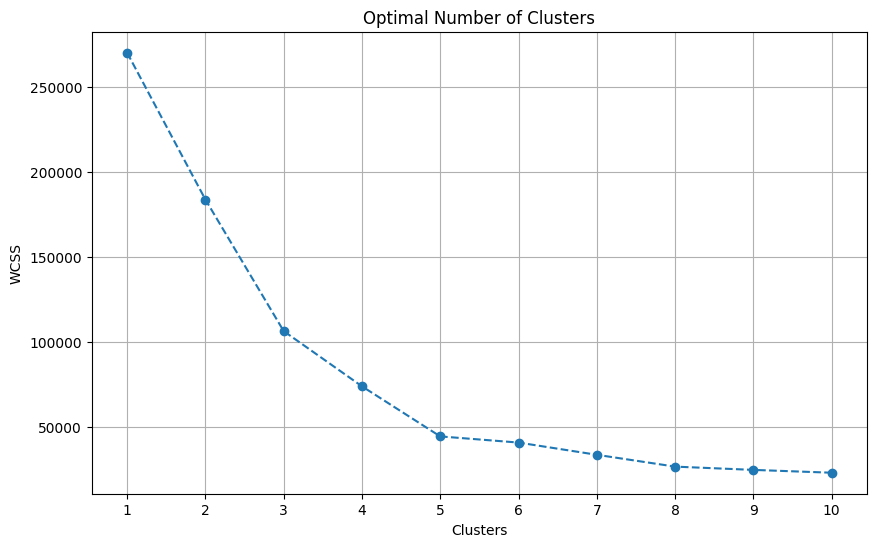

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Optimal Number of Clusters')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

##### Certain drop of values at 3 and 5 :

In [15]:
A=("Optimum Number of Clusters = 5")
A

'Optimum Number of Clusters = 5'

##### TRAINING THE MODEL

In [16]:
KM = KMeans(n_clusters=5, init='k-means++', random_state=42)

###### Return a label for each data point based on their cluster

In [17]:
Y = KM.fit_predict(X)

print(Y)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


##### There are 5 Clusters = 0,1,2,3,4

##### VISUALIZING ALL THE CLUSTERS

##### Plotting all Clusters and Centroids

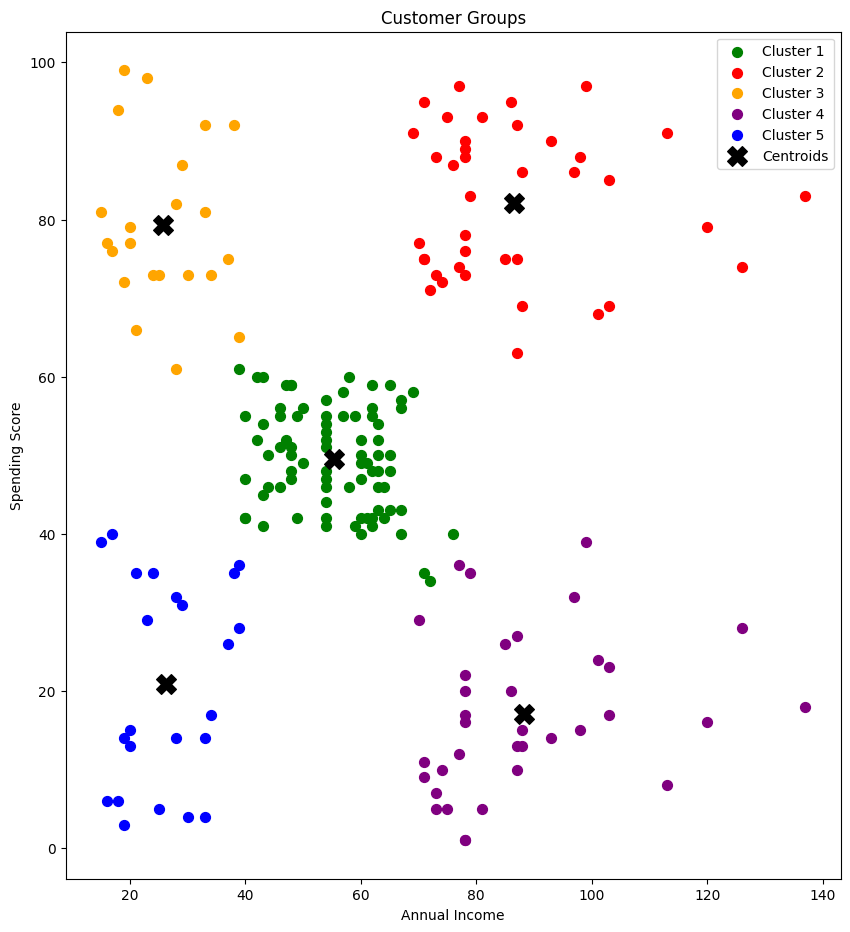

In [18]:
plt.figure(figsize=(10,11))

plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='orange', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='purple', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='blue', label='Cluster 5')

plt.scatter(KM.cluster_centers_[:,0], KM.cluster_centers_[:,1],marker='X', s=200, c='black', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()